In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [23]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [24]:
data['Time'] = pd.to_datetime(data['Time'])

In [25]:
data.set_index('Time', inplace=True)

In [26]:
data.drop(columns=['ESI 2', 'ESI 1', 'ESI 3', 'ESI 4'], inplace=True)

In [27]:
esi1_daily = data['ESI 5'].resample('D').sum()

In [28]:
esi1_daily_df = esi1_daily.reset_index()

In [29]:
esi1_daily_df.columns = ['Date', 'ESI 5']

In [30]:
print(esi1_daily_df)

           Date  ESI 5
0    2017-01-01      2
1    2017-01-02      2
2    2017-01-03      4
3    2017-01-04      3
4    2017-01-05      1
...         ...    ...
1456 2020-12-27      5
1457 2020-12-28      8
1458 2020-12-29      9
1459 2020-12-30      8
1460 2020-12-31      3

[1461 rows x 2 columns]


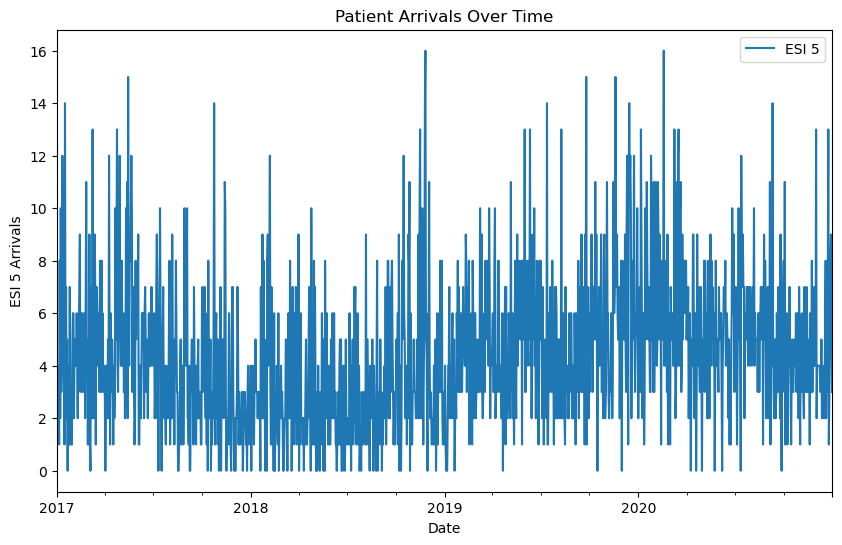

In [31]:
esi1_daily_df.plot(x='Date', y='ESI 5', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 5 Arrivals')
plt.show()

In [32]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [33]:
model = auto_arima(train['ESI 5'], seasonal=False, max_p=5, max_d=2, max_q=5, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['ESI 5'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6355.785, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7140.665, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6805.478, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6355.262, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7138.669, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6354.026, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6355.978, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6354.314, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6354.060, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6636.893, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6352.134, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6353.354, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6803.486, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6354.087, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [35]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    6.050992
1315    5.842073
1316    5.831020
1317    5.830435
1318    5.830404
          ...   
1456    5.830402
1457    5.830402
1458    5.830402
1459    5.830402
1460    5.830402
Length: 147, dtype: float64


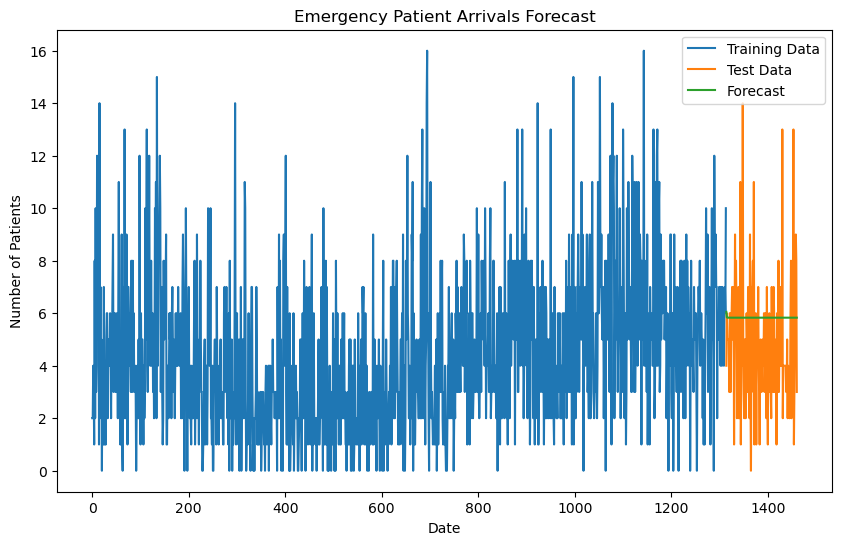

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 5'], label='Training Data')
plt.plot(test.index, test['ESI 5'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [37]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [38]:
mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)

MAPE: inf


C:\Users\kriti\AppData\Local\Temp\ipykernel_7584\133553794.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - forecast) / actual)) * 100


In [39]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [40]:
rmse = root_mean_squared_error(test['ESI 5'], forecast_values)
print("RMSE:", rmse)

RMSE: 2.6537872327855125


In [41]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Find indices of zero values in y_true
    zero_indices = np.where(y_true == 0)[0]
    
    # Create a boolean mask to filter zero values
    mask = np.ones(len(y_true), dtype=bool)
    mask[zero_indices] = False
    
    # Filter y_true and y_pred using the mask
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calculate absolute percentage error
    absolute_errors = np.abs(y_true_filtered - y_pred_filtered)
    
    # Calculate percentage errors
    percentage_errors = absolute_errors / y_true_filtered
    
    # Calculate mean absolute percentage error
    mape = np.mean(percentage_errors) * 100
    return mape


mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)


MAPE: 77.95376367528866


In [42]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 5'], forecast_values)
print("MAE:", mae)

MAE: 2.153230800568724
